![Text](img.png)

# Problem Formulation

Shiva has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Shiva wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is.

**The data definition is as follows:** <br>


**battery_power**-Total energy a battery can store in one time measured in mAh

**blue**-Has bluetooth or not

**clock**_speed-speed at which microprocessor executes instructions

**dual_sim**-Has dual sim support or not

**fc**-Front Camera mega pixels

**four_g**-Has 4G or not

**int_memory**-Internal Memory in Gigabytes

**m_dep**-Mobile Depth in cm

**mobile_wt**-Weight of mobile phone

**n_cores**-Number of cores of processor

**pc**-Primary Camera mega pixels

**px_height**-Pixel Resolution Height

**px_width**-Pixel Resolution Width

**ram**-Random Access Memory in Megabytes

**sc_h**-Screen Height of mobile in cm

**sc_w**-Screen Width of mobile in cm

**talk_time**-longest time that a single battery charge will last when you are

**three_g**-Has 3G or not

**touch_screen**-Has touch screen or not

**wifi**-Has wifi or not


# Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None    
pd.options.display.float_format = '{:.6f}'.format
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from yellowbrick.target import ClassBalance

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

# Read Train Data

In [3]:
df_train=pd.read_csv('Mobile_PriceRange.csv')
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.200000,0,1,0,7,0.600000,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.500000,1,0,1,53,0.700000,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.500000,1,2,1,41,0.900000,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.500000,0,0,0,10,0.800000,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.200000,0,13,1,44,0.600000,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


# Number of rows and columns of train data

In [4]:
print("Number of rows    :",df_train.shape[0])
print("Number of columns :",df_train.shape[1])

Number of rows    : 2000
Number of columns : 21


# Data types of columns

In [5]:
df_train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# Check for missing values

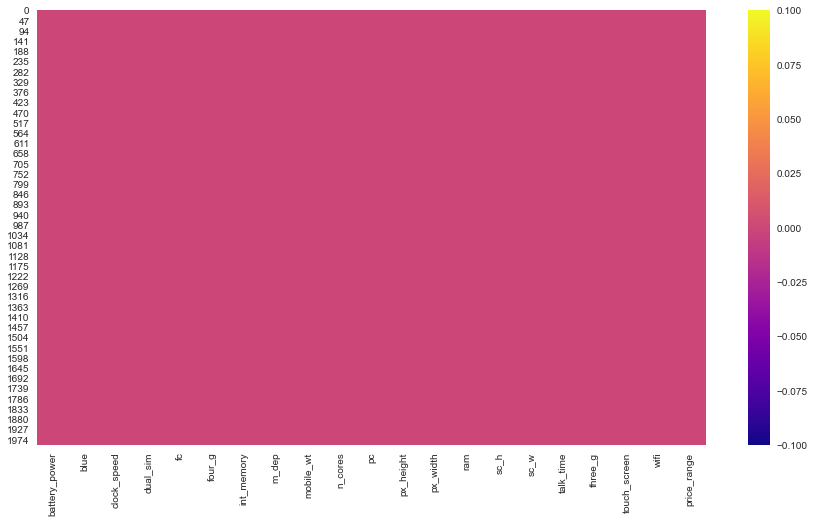

In [7]:
sns.heatmap(df_train.isnull(),cmap="plasma")

**Interpretation**:There are no missing values present in the data

# Outlier Detection using Boxplot

In [8]:
df_num = df_train[["battery_power","clock_speed","fc","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","ram","sc_h","sc_w","talk_time"]]

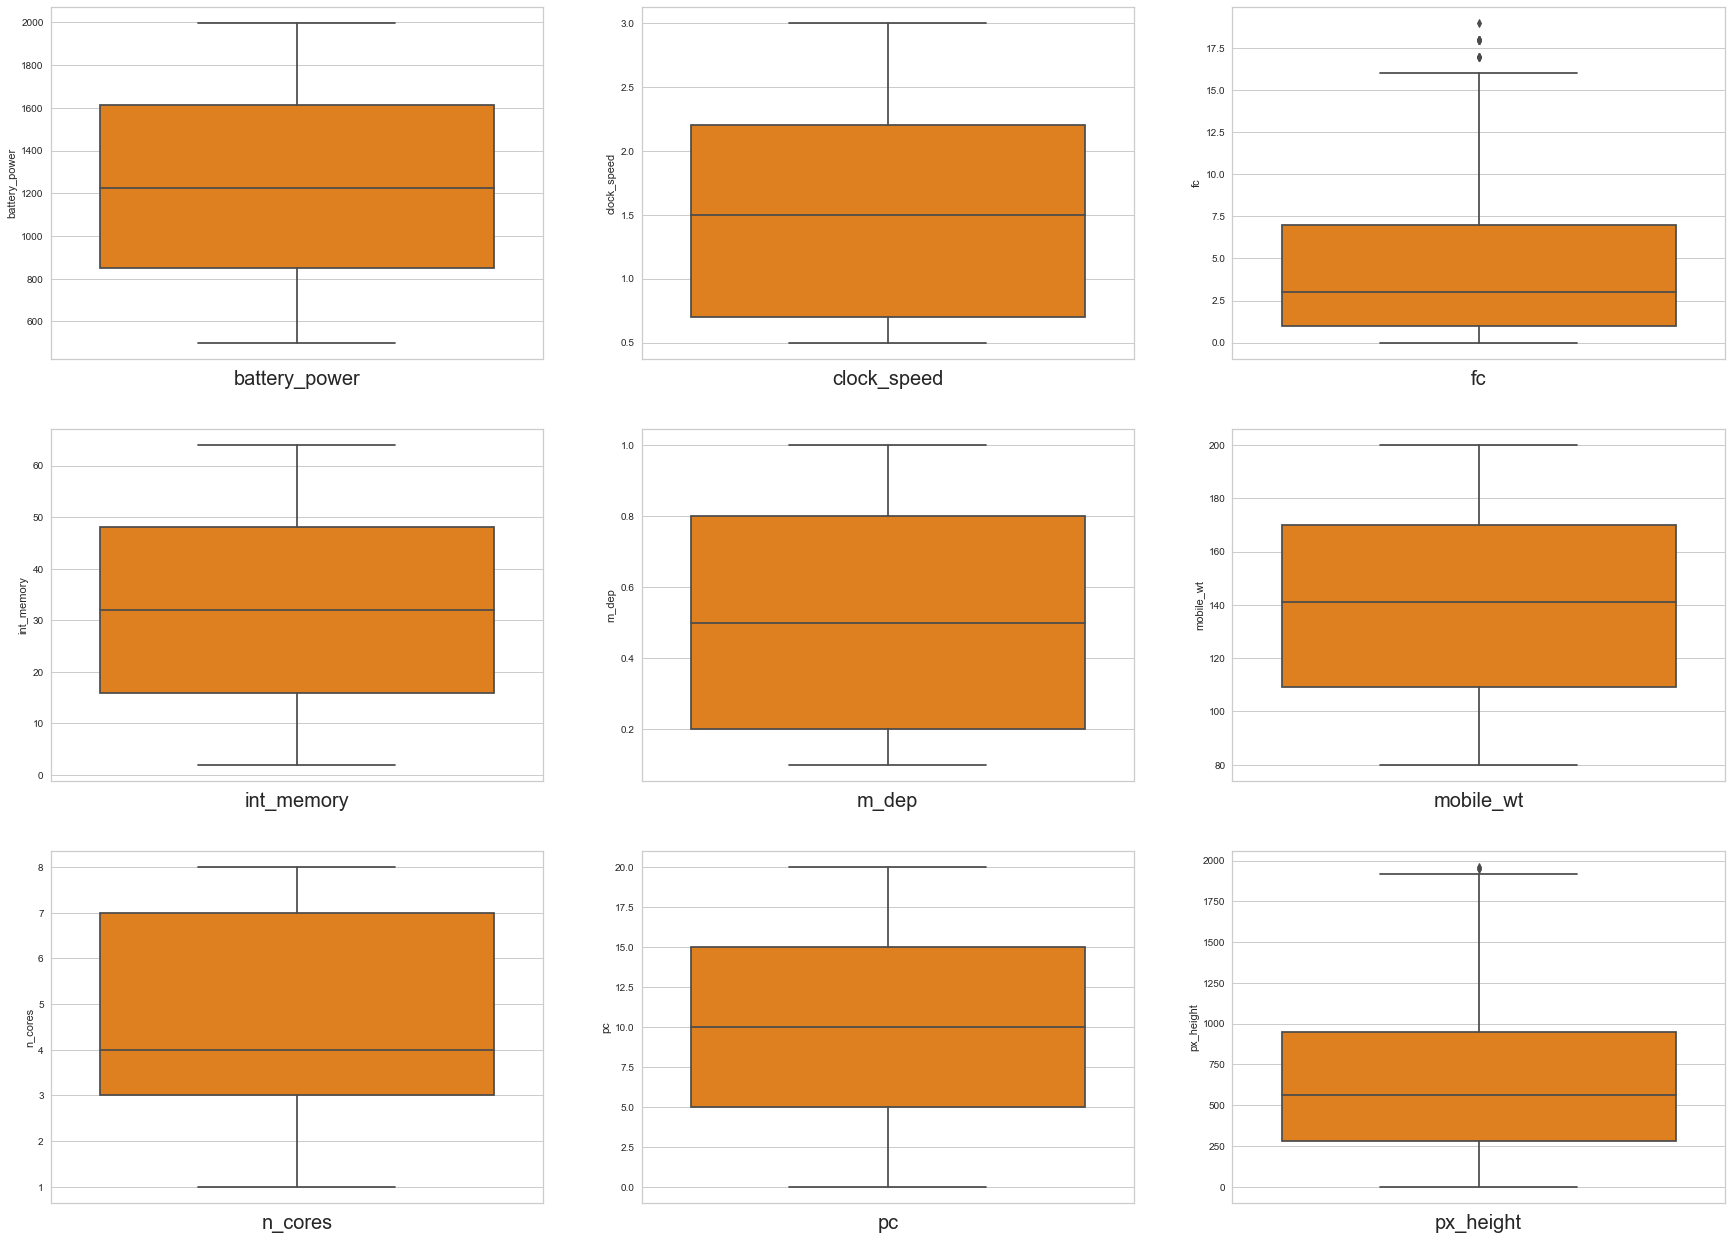

In [9]:
fig, ax = plt.subplots(3,3 , figsize=(30, 22))

for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "v",palette="autumn", whis = 1.5 , ax = subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)

**Interpretation**: Very few outliers are present in the data

# Statistical summary of the data

In [10]:
df_num.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,3998.000000,19.000000,18.000000,20.000000


# Standard Deviation, Skewness and Kurtosis of numerical data

In [11]:
pd.DataFrame({"Standard Deviation":df_num.std(),"Skewness":df_num.skew(),"Kurtosis":df_num.kurt()})

,Standard Deviation,Skewness,Kurtosis
battery_power,439.418206,0.031898,-1.224144
clock_speed,0.816004,0.178084,-1.323417
fc,4.341444,1.019811,0.277076
int_memory,18.145715,0.057889,-1.216074
m_dep,0.288416,0.089082,-1.274349
mobile_wt,35.399655,0.006558,-1.210376
n_cores,2.287837,0.003628,-1.229750
pc,6.064315,0.017306,-1.171499
px_height,443.780811,0.666271,-0.315865
ram,1084.732044,0.006628,-1.191913


# Co-relation Matrix

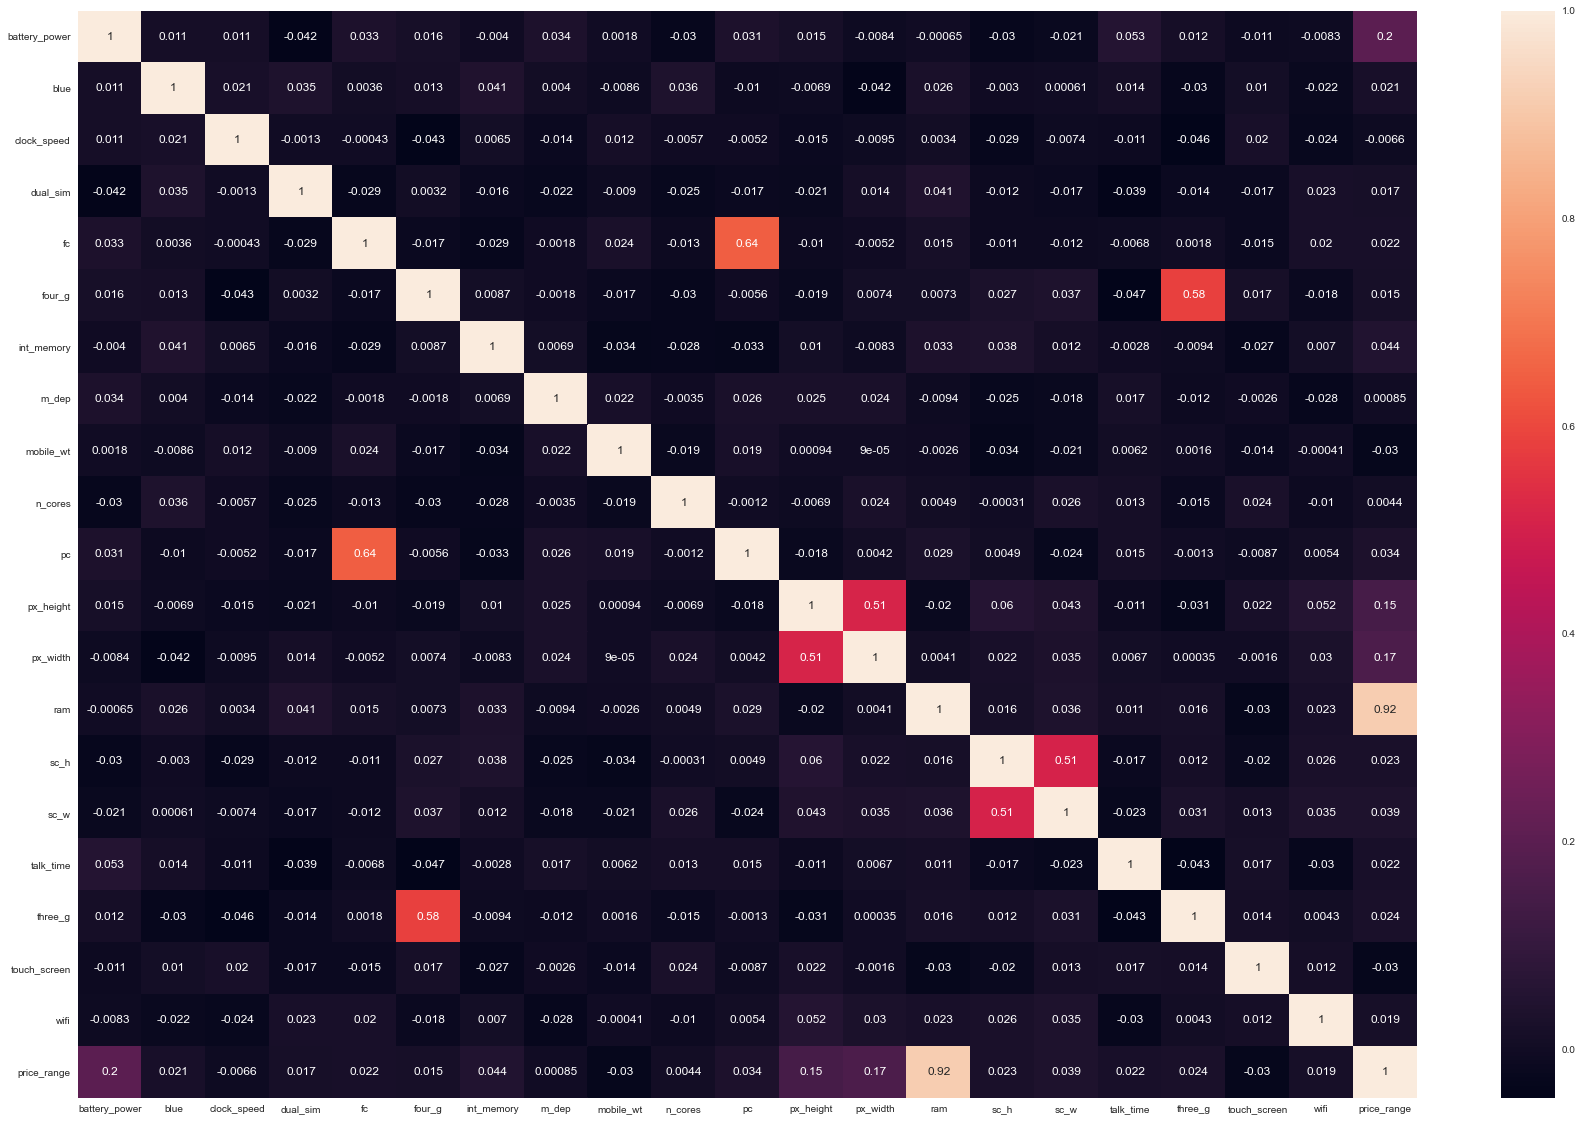

In [12]:
plt.figure(figsize=(30,20))
sns.heatmap(df_train.corr(),annot=True)

In [13]:
df_train.corr()["price_range"].sort_values(ascending=False)[1:]

ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

**Interpretation**: Ram of the mobile is very significant in deciding the price.

# Scaling of numerical columns

In [14]:
sc=StandardScaler()
df_train[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']]=sc.fit_transform(df_train[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']])

In [15]:
X=df_train.drop('price_range',axis=1)
y=df_train['price_range']

# Train -Test split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

# Class Balance Visualization

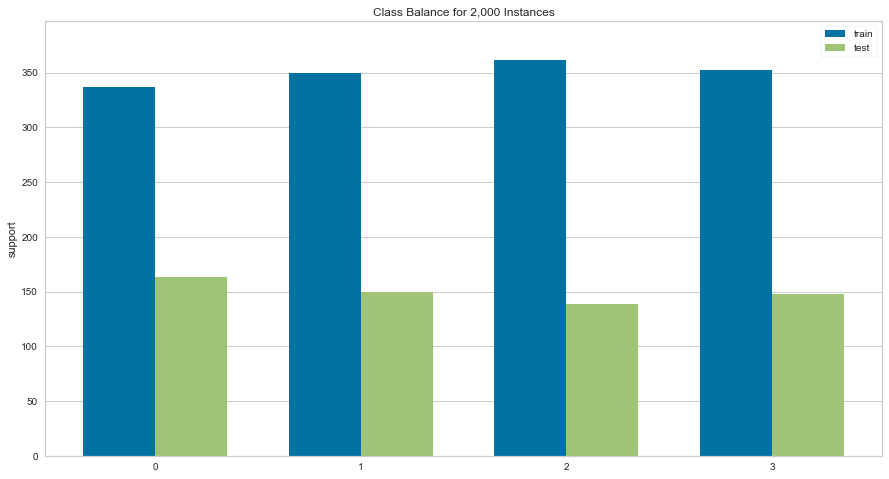

In [17]:
visualizer = ClassBalance(labels=[0, 1, 2,3])
visualizer.fit(y_train, y_test)
visualizer.poof()

In [18]:
def get_train_accuracy(model):
    train_pred = model.predict(X_train)
    return(accuracy_score(y_train, train_pred))

In [19]:
def get_test_accuracy(model):
    test_pred = model.predict(X_test)
    return(accuracy_score(y_test, test_pred))

In [20]:
def get_test_report(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))

In [21]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1','Predicted:2','Predicted:3'], index = ['Actual:0','Actual:1','Actual:2','Actual:3'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show()

In [22]:
score_card=pd.DataFrame(columns=["Algorithm_name",'Train_accuracy','Test_accuracy'])
def update_score_card(algorithm_name, model):
    global score_card
    score_card = score_card.append({'Algorithm_name': algorithm_name,
                       'Train_accuracy': get_train_accuracy(model), 
                       'Test_accuracy': get_test_accuracy(model)}, ignore_index = True)

# Naive Bayes

In [23]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)
update_score_card("Naive Bayes",gnb_model)
score_card

,Algorithm_name,Train_accuracy,Test_accuracy
0,Naive Bayes,0.818571,0.791667


# KNN

In [24]:
knn=KNeighborsClassifier(n_neighbors=12)
knn_model=knn.fit(X_train,y_train)
update_score_card("KNN",knn_model)
score_card

,Algorithm_name,Train_accuracy,Test_accuracy
0,Naive Bayes,0.818571,0.791667
1,KNN,0.711429,0.623333


# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)
update_score_card("LogisticRegression",lg)
score_card

,Algorithm_name,Train_accuracy,Test_accuracy
0,Naive Bayes,0.818571,0.791667
1,KNN,0.711429,0.623333
2,LogisticRegression,0.981429,0.951667


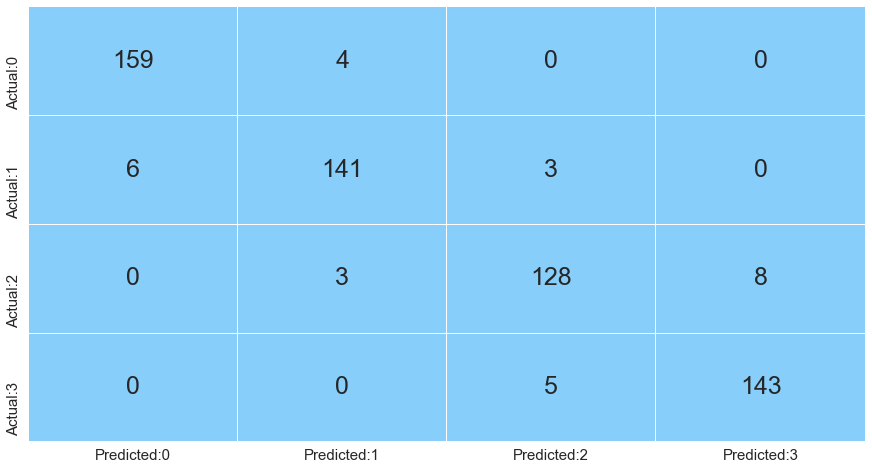

In [26]:
plot_confusion_matrix(lg)

# Decision Tree classifier

In [27]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
update_score_card("DecisionTreeClassifier",dt_model)
score_card

,Algorithm_name,Train_accuracy,Test_accuracy
0,Naive Bayes,0.818571,0.791667
1,KNN,0.711429,0.623333
2,LogisticRegression,0.981429,0.951667
3,DecisionTreeClassifier,1.000000,0.833333


# Random Forest

In [28]:
ran_model=RandomForestClassifier()
ran_model.fit(X_train, y_train)
update_score_card("RandomForest",ran_model)
score_card

,Algorithm_name,Train_accuracy,Test_accuracy
0,Naive Bayes,0.818571,0.791667
1,KNN,0.711429,0.623333
2,LogisticRegression,0.981429,0.951667
3,DecisionTreeClassifier,1.000000,0.833333
4,RandomForest,1.000000,0.860000


# Ada-Boost

In [29]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
update_score_card("Ada-Boost",ada_model)
score_card

,Algorithm_name,Train_accuracy,Test_accuracy
0,Naive Bayes,0.818571,0.791667
1,KNN,0.711429,0.623333
2,LogisticRegression,0.981429,0.951667
3,DecisionTreeClassifier,1.000000,0.833333
4,RandomForest,1.000000,0.860000
5,Ada-Boost,0.770714,0.756667


# Gradient Boosting

In [30]:
gboost_model = GradientBoostingClassifier()
gboost_model.fit(X_train, y_train)
update_score_card("Gradient Boosting",gboost_model)
score_card

,Algorithm_name,Train_accuracy,Test_accuracy
0,Naive Bayes,0.818571,0.791667
1,KNN,0.711429,0.623333
2,LogisticRegression,0.981429,0.951667
3,DecisionTreeClassifier,1.000000,0.833333
4,RandomForest,1.000000,0.860000
5,Ada-Boost,0.770714,0.756667
6,Gradient Boosting,0.999286,0.890000


# XGBoost

In [31]:
xgb_model = XGBClassifier(booster="gbtree")
xgb_model.fit(X_train, y_train)
update_score_card("XGBoost",xgb_model)
score_card

[08:28:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Algorithm_name,Train_accuracy,Test_accuracy
0,Naive Bayes,0.818571,0.791667
1,KNN,0.711429,0.623333
2,LogisticRegression,0.981429,0.951667
3,DecisionTreeClassifier,1.000000,0.833333
4,RandomForest,1.000000,0.860000
5,Ada-Boost,0.770714,0.756667
6,Gradient Boosting,0.999286,0.890000
7,XGBoost,1.000000,0.913333


# Feature Importance

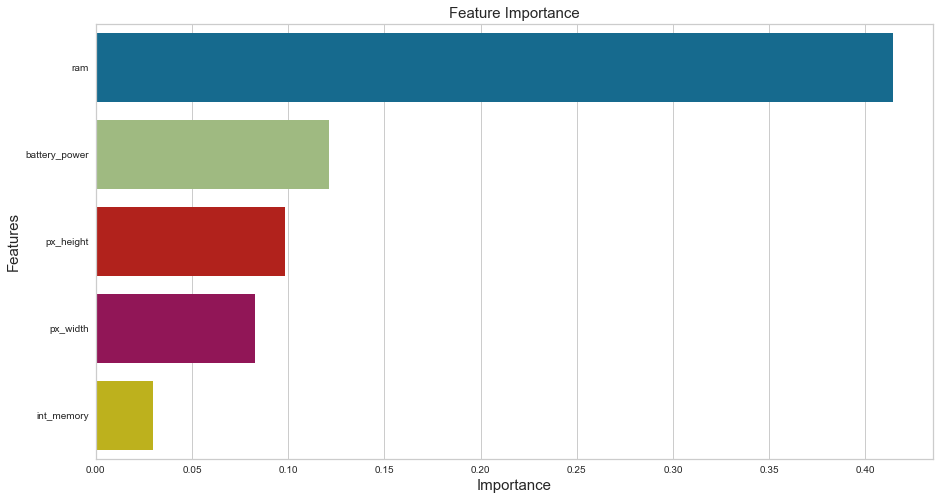

In [32]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain 
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features[:5])

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The above bar plot shows that, the variable `ram` is of highest importance. 

# Tuning Hyperparameters using Grid Search CV

In [33]:
tuning_parameters = {'learning_rate': [0.01, 0.1, 1, 2,3,],
                     'max_depth': range(3,15,3),
                     'gamma': [0, 1, 2, 3, 4]}

# instantiate the 'XGBClassifier' 
xgb_model = XGBClassifier(verbosity=0)

# use GridSearchCV() to find the optimal value of the hyperparameters
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 5, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3} 



In [34]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

# use fit() to fit the model on the train set
xgb_model = xgb_grid_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
update_score_card("XGBoost(Grid_search)",xgb_model)
score_card

,Algorithm_name,Train_accuracy,Test_accuracy
0,Naive Bayes,0.818571,0.791667
1,KNN,0.711429,0.623333
2,LogisticRegression,0.981429,0.951667
3,DecisionTreeClassifier,1.000000,0.833333
4,RandomForest,1.000000,0.860000
5,Ada-Boost,0.770714,0.756667
6,Gradient Boosting,0.999286,0.890000
7,XGBoost,1.000000,0.913333
8,XGBoost(Grid_search),0.844286,0.800000


# Hyperparameter tuning using Randomized Search CV

In [35]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rf_random = RandomizedSearchCV(estimator = ran_model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(X_train,y_train)

rf_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [36]:
ran_model_tuned=RandomForestClassifier(n_estimators=1000,
 min_samples_split=2,
 min_samples_leaf=1,
 max_features= 'sqrt',
 max_depth=25)
ran_model_tuned.fit(X_train, y_train)
#print(get_test_report(ran_model))
update_score_card("RandomForest_Tuned",ran_model_tuned)
score_card

,Algorithm_name,Train_accuracy,Test_accuracy
0,Naive Bayes,0.818571,0.791667
1,KNN,0.711429,0.623333
2,LogisticRegression,0.981429,0.951667
3,DecisionTreeClassifier,1.000000,0.833333
4,RandomForest,1.000000,0.860000
5,Ada-Boost,0.770714,0.756667
6,Gradient Boosting,0.999286,0.890000
7,XGBoost,1.000000,0.913333
8,XGBoost(Grid_search),0.844286,0.800000
9,RandomForest_Tuned,1.000000,0.878333


# XGBoost model with important features

In [37]:
X=df_train.drop(['clock_speed','int_memory','m_dep','n_cores','pc','sc_h','sc_w','talk_time','blue','four_g','dual_sim','three_g'],axis=1)

In [38]:
y=df_train['price_range']

In [39]:
X=X.drop(['touch_screen','wifi','price_range'],axis=1)

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [41]:
xgb_model_imp = XGBClassifier(booster="gbtree")
xgb_model_imp.fit(X_train, y_train)
update_score_card("XGBoost_imp",xgb_model_imp)
score_card

,Algorithm_name,Train_accuracy,Test_accuracy
0,Naive Bayes,0.818571,0.791667
1,KNN,0.711429,0.623333
2,LogisticRegression,0.981429,0.951667
3,DecisionTreeClassifier,1.000000,0.833333
4,RandomForest,1.000000,0.860000
5,Ada-Boost,0.770714,0.756667
6,Gradient Boosting,0.999286,0.890000
7,XGBoost,1.000000,0.913333
8,XGBoost(Grid_search),0.844286,0.800000
9,RandomForest_Tuned,1.000000,0.878333


In [42]:
tuning_parameters = {'learning_rate': [0.01, 0.1, 1, 2,3,],
                     'max_depth': range(3,15,3),
                     'gamma': [0, 1, 2, 3, 4]}

# instantiate the 'XGBClassifier' 
xgb_model = XGBClassifier(verbosity=0)

# use GridSearchCV() to find the optimal value of the hyperparameters
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 5, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3} 



In [43]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

# use fit() to fit the model on the train set
xgb_model = xgb_grid_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
update_score_card("XGBoost_imp(Grid_search)",xgb_model)
score_card

,Algorithm_name,Train_accuracy,Test_accuracy
0,Naive Bayes,0.818571,0.791667
1,KNN,0.711429,0.623333
2,LogisticRegression,0.981429,0.951667
3,DecisionTreeClassifier,1.000000,0.833333
4,RandomForest,1.000000,0.860000
5,Ada-Boost,0.770714,0.756667
6,Gradient Boosting,0.999286,0.890000
7,XGBoost,1.000000,0.913333
8,XGBoost(Grid_search),0.844286,0.800000
9,RandomForest_Tuned,1.000000,0.878333


In [44]:
pred_test=xgb_model.predict(X_test)
cm=confusion_matrix(y_test,pred_test)

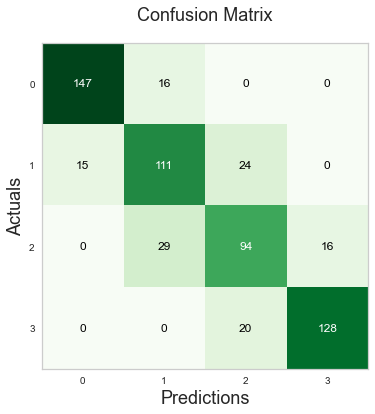

In [45]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [46]:
print(get_test_report(xgb_model_imp))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       163
           1       0.89      0.88      0.89       150
           2       0.90      0.88      0.89       139
           3       0.95      0.94      0.95       148

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



# Random Forest with important features

In [47]:
ran_model_imp=RandomForestClassifier()
ran_model_imp.fit(X_train, y_train)
update_score_card("RandomForest_imp",ran_model_imp)
score_card

,Algorithm_name,Train_accuracy,Test_accuracy
0,Naive Bayes,0.818571,0.791667
1,KNN,0.711429,0.623333
2,LogisticRegression,0.981429,0.951667
3,DecisionTreeClassifier,1.000000,0.833333
4,RandomForest,1.000000,0.860000
5,Ada-Boost,0.770714,0.756667
6,Gradient Boosting,0.999286,0.890000
7,XGBoost,1.000000,0.913333
8,XGBoost(Grid_search),0.844286,0.800000
9,RandomForest_Tuned,1.000000,0.878333


In [48]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rf_random = RandomizedSearchCV(estimator = ran_model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(X_train,y_train)

rf_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [49]:
ran_model=RandomForestClassifier(n_estimators=1000,
 min_samples_split=2,
 min_samples_leaf=1,
 max_features= 'sqrt',
 max_depth=25)
ran_model.fit(X_train, y_train)
#print(get_test_report(ran_model))
update_score_card("RandomForest_imp_CV",ran_model)
score_card

,Algorithm_name,Train_accuracy,Test_accuracy
0,Naive Bayes,0.818571,0.791667
1,KNN,0.711429,0.623333
2,LogisticRegression,0.981429,0.951667
3,DecisionTreeClassifier,1.000000,0.833333
4,RandomForest,1.000000,0.860000
5,Ada-Boost,0.770714,0.756667
6,Gradient Boosting,0.999286,0.890000
7,XGBoost,1.000000,0.913333
8,XGBoost(Grid_search),0.844286,0.800000
9,RandomForest_Tuned,1.000000,0.878333


# Logistic Regression Model with Important Features

In [50]:
lg_imp = LogisticRegression()
lg_imp.fit(X_train, y_train)
print('Test_Accuracy:',get_test_accuracy(lg_imp))
print('Train_Accuracy:',get_train_accuracy(lg_imp))

Test_Accuracy: 0.965
Train_Accuracy: 0.9771428571428571


In [ ]:
pred_test=lg_imp.predict(X_test)
cm=confusion_matrix(y_test,pred_test)

So we can see Logistic Regression is giving the best accuracy for our dataset. The difference between train and test accuracies are significantly minimum for that model also. XGBoost(Grid_search) and XGBoost_imp(Grid_search) are tuned properly because the train_accuracy and test_accuracy are almost equal. Other models are somewhat over-fitted. So we can conclude Logistic Regression or XGBoost_imp(Grid_search) as the final model. 

# Stacking

In [51]:
#consider the various algorithms as base learners
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, n_estimators = 50, random_state = 10)),
                 ('Xgb_model', XGBClassifier(verbosity=0))]

#initialize stacking classifier
#pass the base learners to the parameter, 'estimators'
#pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())

#fit the model on train dataset
stack_model.fit(X_train, y_train)

update_score_card("Stack Model",stack_model)
score_card

,Algorithm_name,Train_accuracy,Test_accuracy
0,Naive Bayes,0.818571,0.791667
1,KNN,0.711429,0.623333
2,LogisticRegression,0.981429,0.951667
3,DecisionTreeClassifier,1.000000,0.833333
4,RandomForest,1.000000,0.860000
5,Ada-Boost,0.770714,0.756667
6,Gradient Boosting,0.999286,0.890000
7,XGBoost,1.000000,0.913333
8,XGBoost(Grid_search),0.844286,0.800000
9,RandomForest_Tuned,1.000000,0.878333
